# Read merged dataset

In [1]:
import pandas as pd

df = pd.read_csv('merged_reviews.csv')
df.head()

,review,rating,date
0,This place is definitely the happiest place on...,5 star rating,12/26/2022
1,Disneyland is great for the themes and nostalg...,4 star rating,1/8/2023
2,Price range: ridiculously high To consider: lo...,2 star rating,1/10/2023
3,The Mickey Mouse Salted Pretzel from the Coca ...,1 star rating,1/10/2023
4,"Nicole, Blonde girl, pirates of the Caribbean ...",1 star rating,1/9/2023


# Cleaning

Check and remove rows with null values

In [2]:
print(df.shape)
df.isnull().any()

(31800, 3)


review    False
rating    False
date       True
dtype: bool

In [3]:
df.dropna(inplace=True)
print(df.shape)

(31398, 3)


extract the rating - remove unneccesary characters

In [4]:
# extract numerical rating
import re

df['rating'] = df['rating'].str[:1]
df.head()

,review,rating,date
0,This place is definitely the happiest place on...,5,12/26/2022
1,Disneyland is great for the themes and nostalg...,4,1/8/2023
2,Price range: ridiculously high To consider: lo...,2,1/10/2023
3,The Mickey Mouse Salted Pretzel from the Coca ...,1,1/10/2023
4,"Nicole, Blonde girl, pirates of the Caribbean ...",1,1/9/2023


change all date values to the same format of year-month
- create a year column
- create a month column

In [5]:
# function to convert google dates to datetime object

# convert date values to actual calander date values
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

datenow = datetime.today()

def googleconvert(item):
#     for index, item in enumerate(alldate):
    if 'year' in item:
        dateposted = datenow - relativedelta(years=int(item[0]))
    elif 'month' in item:
        dateposted = datenow - relativedelta(months=int(item[0]))
    elif 'week' in item:
        dateposted = datenow - timedelta(weeks=int(item[0]))
    elif 'day' in item:
        dateposted = datenow - timedelta(days=int(item[0]))

    fulldate = dateposted.date()
    cldate = fulldate.strftime('%Y-%m')
    year = fulldate.strftime('%Y')
    month = fulldate.strftime('%B')
    
    return cldate, year, month

In [6]:

def changedates(alldates):
    years=[]
    months=[]
    for index, d in enumerate(alldates):
        d = str(d)
        if 'on' in d:
            newdate = d.rstrip(' ago on Google')
            newdate = re.sub('a ', '1 ', newdate)
            newdate = re.sub(r's\b', '', newdate)
            full, y, m= googleconvert(newdate)
            
        elif '/' in d:
            datefull = datetime.strptime(d, '%m/%d/%Y')
            
            full= datefull.strftime('%Y-%m')
            y = datefull.strftime('%Y')
            m = datefull.strftime('%B')
            
        else:
            dateonly = re.search("^\w+.\d+", d)
            dateonly = dateonly.group()
            datefull = datetime.strptime(dateonly, '%b %Y')
            
            full= datefull.strftime('%Y-%m')
            y = datefull.strftime('%Y')
            m = datefull.strftime('%B')
            
        alldates[index] = full
        years.append(y)
        months.append(m)
            
    return alldates, years, months

df['date_posted'] = ''
df['year'] = ''
df['month'] = ''
df['date_posted'], df['year'], df['month'] = changedates(list(df['date']))

In [7]:
df.tail()

,review,rating,date,date_posted,year,month
31795,Only reason I'm giving the four star review is...,4,3 years ago on Google,2020-01,2020,January
31796,If your going make sure you first get to the c...,4,4 years ago on Google,2019-01,2019,January
31797,"I visited the park this summer with my kids, i...",3,7 years ago on Google,2016-01,2016,January
31798,"Many fun little secrets, and different shows. ...",5,6 years ago on Google,2017-01,2017,January
31799,Like if you don't want to die in a roller-coaster,5,3 years ago on Google,2020-01,2020,January


In [8]:
df.head()

,review,rating,date,date_posted,year,month
0,This place is definitely the happiest place on...,5,12/26/2022,2022-12,2022,December
1,Disneyland is great for the themes and nostalg...,4,1/8/2023,2023-01,2023,January
2,Price range: ridiculously high To consider: lo...,2,1/10/2023,2023-01,2023,January
3,The Mickey Mouse Salted Pretzel from the Coca ...,1,1/10/2023,2023-01,2023,January
4,"Nicole, Blonde girl, pirates of the Caribbean ...",1,1/9/2023,2023-01,2023,January


remove column with different date formats

In [9]:
df.drop('date', axis=1, inplace=True)
df.head()

,review,rating,date_posted,year,month
0,This place is definitely the happiest place on...,5,2022-12,2022,December
1,Disneyland is great for the themes and nostalg...,4,2023-01,2023,January
2,Price range: ridiculously high To consider: lo...,2,2023-01,2023,January
3,The Mickey Mouse Salted Pretzel from the Coca ...,1,2023-01,2023,January
4,"Nicole, Blonde girl, pirates of the Caribbean ...",1,2023-01,2023,January


assign appropriate datatypes for each column

In [10]:
df.dtypes

review         object
rating         object
date_posted    object
year           object
month          object
dtype: object

In [11]:
df.astype({'review': 'string', 'rating':'int'}).dtypes

review         string
rating          int32
date_posted    object
year           object
month          object
dtype: object

clean reviews
- remove html in reviews
- remove punctuation
- change all reviews to lowercase

In [12]:
import string

# remove html in reviews
df['review'] = [re.sub('<[^<>]*>', ' ',i) for i in df['review']]

# remove punctuation
punctuation = '[' + re.escape(string.punctuation)+']'
df['review'] = [re.sub(punctuation, ' ',i) for i in df['review']]

# change all reviews to lowercase
df['review'] = [i.lower() for i in df['review']]

#### Assign sentiment
- rating 4 or 5 = positive
- rating 1 or 2 = negative
- sample positive sentiments to balance sentiment in the dataset




In [13]:
print('How many rows have a rating of 4 or 5:', df.loc[(df['rating'] == '4') | (df['rating']=='5')].shape)
print('How many rows have a rating of 1 or 2:', df.loc[(df['rating']=='1') | (df['rating']=='2')].shape)

How many rows have a rating of 4 or 5: (24320, 5)
How many rows have a rating of 1 or 2: (4334, 5)


reviews with rating=3 are removed
- These reviews may not be neutral like described by their rating but instead, lean more towards positive or negative. I would have to read through each 3-star review to assign an accurate sentiment. 
- it would be too laborious and time-consuming to assign sentiment individually. There are also enough training records for an accurate model after removing 3-star reviews, with 24,320 ‘positive’ reviews and 4,334 ‘negative’ reviews left. 

In [14]:
dfpos = df.loc[(df['rating'] == '4') | (df['rating']=='5')]

# keep 5000 positive records
dfpos = dfpos.iloc[:5000]
dfpos['sentiment'] = 'positive'

In [15]:
dfpos.head()

,review,rating,date_posted,year,month,sentiment
0,this place is definitely the happiest place on...,5,2022-12,2022,December,positive
1,disneyland is great for the themes and nostalg...,4,2023-01,2023,January,positive
5,i am so happy i got to celebrate my 50th bday ...,5,2023-01,2023,January,positive
6,i waited till i was almost 40 yr old to visit ...,5,2022-12,2022,December,positive
7,i went here as a kid then 6 years ago and rec...,4,2022-12,2022,December,positive


In [16]:
dfneg = df.loc[(df['rating']=='1') | (df['rating']=='2')]
dfneg['sentiment'] = 'negative'

C:\Users\zoe\AppData\Local\Temp/ipykernel_25480/2119917501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfneg['sentiment'] = 'negative'


In [17]:
dfneg.head()

,review,rating,date_posted,year,month,sentiment
2,price range ridiculously high to consider lo...,2,2023-01,2023,January,negative
3,the mickey mouse salted pretzel from the coca ...,1,2023-01,2023,January,negative
4,nicole blonde girl pirates of the caribbean ...,1,2023-01,2023,January,negative
15,it was so difficult to get tickets to go here ...,2,2023-01,2023,January,negative
34,disneyland used to be the happiest place on ea...,1,2022-10,2022,October,negative


In [18]:
df = pd.concat([dfpos, dfneg])
df.reset_index(drop = True,inplace=True)

In [19]:
df['sentiment'].value_counts()

positive    5000
negative    4334
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

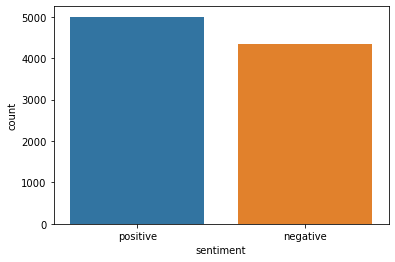

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)

In [21]:
print(df.dtypes)

review         object
rating         object
date_posted    object
year           object
month          object
sentiment      object
dtype: object


In [22]:
df = df.astype({'rating': 'int32', 'year': 'int32'})
print(df.dtypes)

review         object
rating          int32
date_posted    object
year            int32
month          object
sentiment      object
dtype: object


#  Data Understanding

### analyse ratings

1    2646
2    1688
4    1140
5    3860
Name: rating, dtype: int64


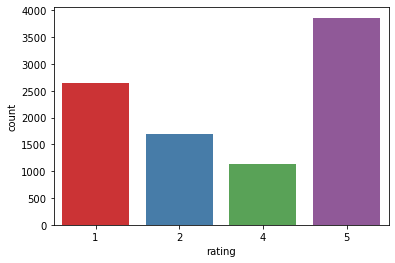

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['rating'].value_counts().sort_index())

color = sns.color_palette("Set1")
sns.countplot(x='rating', data=df, palette=color)
plt.show()

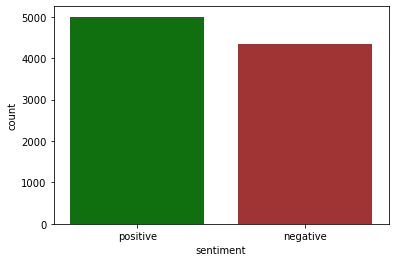

In [24]:
sns.countplot(x='sentiment', data=df, palette=['g', 'firebrick'])
plt.show()

### analyse date

average rating by months

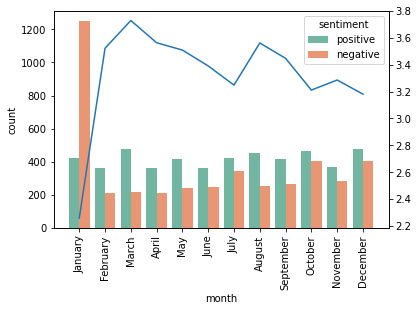

In [25]:
# sort by months
import calendar
df['month'] = pd.Categorical(df.month, categories=calendar.month_name[1:], ordered=True)
df.sort_values('month', inplace=True)


color = sns.color_palette('Set2')
plt.xticks(rotation=90)
ax = sns.countplot(x='month', data=df, hue='sentiment', hue_order=['positive', 'negative'], palette = color)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df['rating'].groupby(by=df['month']).mean())

plt.show()

The chart above visualizes the distribution of sentiment and average rating for each month, disregarding year.
- January has the highest number of reviews, but has the highest number of negative reviews. This explains why January has the lowest average rating, even though it has a high number of reviews.
- March has the highest average rating. Although it does not have the highest number of reviews, it has the highest number of positive reviews.

- This can show that visitors are more likely to leave reviews about their negative experiences, 

average rating by year

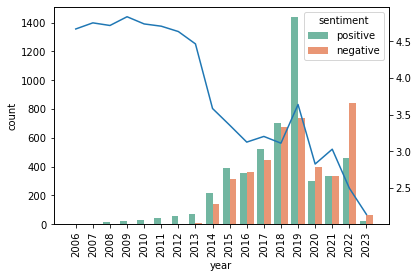

In [26]:
# sort by year
df.sort_values('year', inplace=True)

color = sns.color_palette('Set2')
plt.xticks(rotation=90)
ax = sns.countplot(x='year', data=df, hue='sentiment', hue_order=['positive', 'negative'], palette = color)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df['rating'].groupby(by=df['year']).mean())

plt.show()

The chart above visualizes the distribution of sentiment and average rating for each year.
- 2019 has the highest number of reviews, and the highest number of positive reviews, but does not have a very high average rating.
- 2006 has the least number of reviews, but has the highest average rating.



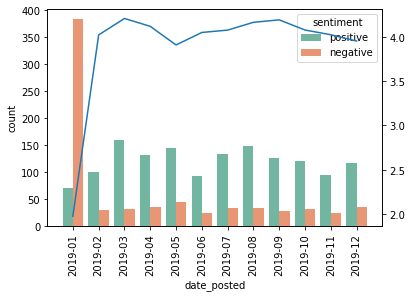

In [27]:
# sort by year and month
df.sort_values(['date_posted'], inplace=True)

color = sns.color_palette('Set2')
plt.xticks(rotation=90)
ax = sns.countplot(x=df[df['year']==2019]['date_posted'], hue=df['sentiment'], hue_order=['positive', 'negative'], palette = color)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df['rating'].groupby(by=df[df['year']==2019]['date_posted']).mean())

plt.show()

The chart visualizes distribution of sentiment in reviews, and average ratings for each month in 2019.
- The chart is very similar the the chart of the distribution of sentiment and average rating for each month, disregarding year.
- This points out that the year with the highest number of reviews would dominate the statistics for each month.

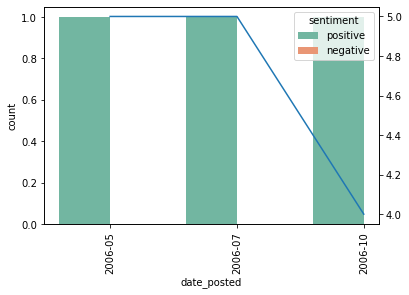

In [28]:
color = sns.color_palette('Set2')
plt.xticks(rotation=90)
ax = sns.countplot(x=df[df['year']==2006]['date_posted'], hue=df['sentiment'], hue_order=['positive', 'negative'], palette = color)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df['rating'].groupby(by=df[df['year']==2006]['date_posted']).mean())

plt.show()

In 2006, There are only 3 reviews, and all have a rating of 4 or 5.
- The small number of reviews, paired with high ratings, causes the average rating for 2006 to be significantly higher than other years.

In [29]:
# sort by year and by month

import calendar
df['month'] = pd.Categorical(df.month, categories=calendar.month_name[1:], ordered=True)

df.sort_values(['date_posted', 'month'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,review,rating,date_posted,year,month,sentiment
0,the happiest place on earth how can anyone r...,5,2006-05,2006,May,positive
1,its walt disneyland s 50th anniversary and it...,5,2006-07,2006,July,positive
2,some info and advice for disney goers new and...,4,2006-10,2006,October,positive
3,you got to hate and love this place at the sam...,5,2007-05,2007,May,positive
4,announcer dude hey ian this is your 300th re...,5,2007-06,2007,June,positive


### analyse reviews

####  Tokenize and reduce dimensionality of reviews
- word tokenize reviews
- remove stopwords, numbers, words that contain numbers and words with 2 characters or less
- perform lemmatization for all words


In [30]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zoe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zoe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zoe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\zoe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [31]:
# word_tokenize each review
from nltk.tokenize import word_tokenize

df['words_review'] = df['review'].apply(lambda sent: word_tokenize(sent))

df.head()

,review,rating,date_posted,year,month,sentiment,words_review
0,the happiest place on earth how can anyone r...,5,2006-05,2006,May,positive,"[the, happiest, place, on, earth, how, can, an..."
1,its walt disneyland s 50th anniversary and it...,5,2006-07,2006,July,positive,"[its, walt, disneyland, s, 50th, anniversary, ..."
2,some info and advice for disney goers new and...,4,2006-10,2006,October,positive,"[some, info, and, advice, for, disney, goers, ..."
3,you got to hate and love this place at the sam...,5,2007-05,2007,May,positive,"[you, got, to, hate, and, love, this, place, a..."
4,announcer dude hey ian this is your 300th re...,5,2007-06,2007,June,positive,"[announcer, dude, hey, ian, this, is, your, 30..."


In [32]:
# remove punctuation and stop words
# lemmatize and stemming of words

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
from nltk.stem import PorterStemmer
ps = PorterStemmer()

stopwordlist = list(stopwords.words('english'))
stopwordlist.remove('not')

all_words = []

def reducing(onereview):
    cleanwords = []
    for item in onereview:
        if item not in stopwordlist and not any(c.isdigit() for c in item) and len(item)>2:
            nostop =lem.lemmatize(item, pos='v')
            nostop =lem.lemmatize(item, pos='a')
            nostop =lem.lemmatize(item, pos='s')
            nostop =lem.lemmatize(item, pos='r')
            nostop =lem.lemmatize(item, pos='n')
            cleanwords.append(nostop)
            all_words.append(nostop)

    joined = ' '.join(tt for tt in cleanwords)   
    return joined


In [33]:
df['words_review'] = df['words_review'].apply(lambda x: reducing(x))
df.head()

,review,rating,date_posted,year,month,sentiment,words_review
0,the happiest place on earth how can anyone r...,5,2006-05,2006,May,positive,happiest place earth anyone resist place child...
1,its walt disneyland s 50th anniversary and it...,5,2006-07,2006,July,positive,walt disneyland anniversary still happiest pla...
2,some info and advice for disney goers new and...,4,2006-10,2006,October,positive,info advice disney goer new old mediocre meal ...
3,you got to hate and love this place at the sam...,5,2007-05,2007,May,positive,got hate love place time hate people one crowd...
4,announcer dude hey ian this is your 300th re...,5,2007-06,2007,June,positive,announcer dude hey ian review gon ian going re...


In [34]:
all_words[:5]

['happiest', 'place', 'earth', 'anyone', 'resist']

#### Frequency distribution 

<FreqDist with 18585 samples and 665639 outcomes>
[('ride', 11990), ('park', 11115), ('disneyland', 9504), ('time', 9169), ('not', 8861), ('get', 7440), ('disney', 7264), ('day', 7075), ('line', 6183), ('place', 5749)]


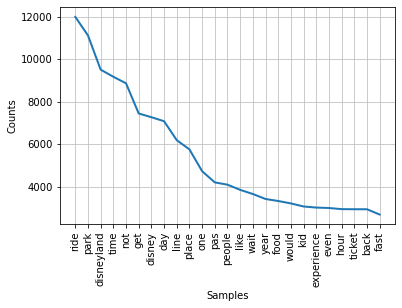

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
from nltk import FreqDist

# frequency distribution on reviews
all_words_frequency = FreqDist(all_words)
print (all_words_frequency)

# print 10 most frequently occurring words
print (all_words_frequency.most_common(10))

# plot the frequency distribution of the top 25 words
all_words_frequency.plot(25, cumulative=False)


#### Word Cloud 

In [36]:
!pip install wordcloud

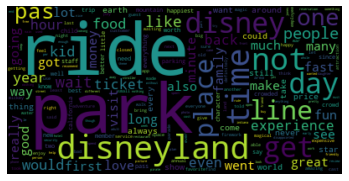

In [37]:
# build wordcloud

from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(all_words_frequency)

# plot the wordcloud
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Network Graph 

In [38]:
!pip install textnets
# restart kernel to use module textnets

!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [39]:
# import library
import textnets as tn

# fixed seed for reproducible
tn.params['seed']=42

corpus = tn.Corpus.from_df(df, doc_col="words_review")
corpus

<Corpus with 9334 documents using language model 'en_core_web_sm'>

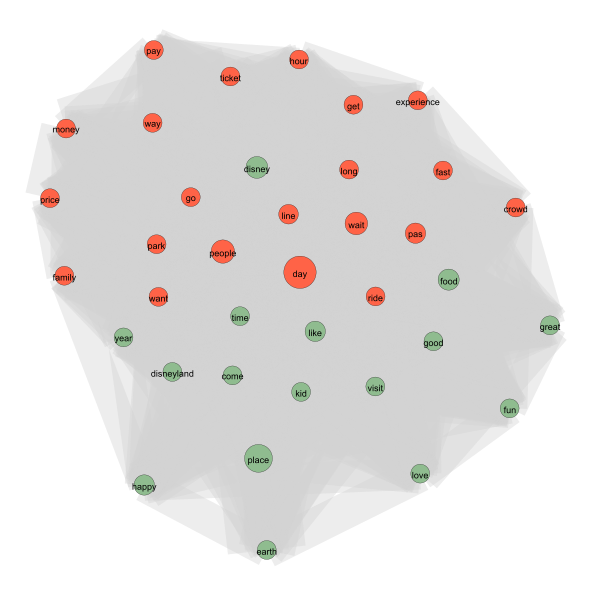

In [40]:
# create textnet
t = tn.Textnet(corpus.tokenized(), min_docs=1500)

# create term network
words = t.project(node_type="term")


# plot the term network
words.plot(label_nodes=True,
           scale_nodes_by="betweenness",
           color_clusters=True,
           alpha=0.42,
           edge_width=[0.1*w for w in words.edges["weight"]], # line weight
           edge_opacity=0.4)
          #  node_label_filter=lambda n: n.betweenness() > words.betweenness.median()) # if lower than score, dont show label

There are 2 distinct categories, 
1. words like great, fun, love, happy, kid, time, food, good. This indicates that reviews mentioned that Disneyland is a fun place, where kids love to go and have a good time, as there is good food available.
2. experience, money, line, long, day, pass, price, crowd. Such words could be an indication of a bad experience at Disneyland. Long lines for rides, causing visitors to spend the whole day there when they initially only bought a day pass. There could be complaints about the ticket price, and the crowds in the park.

# Save to file 

In [42]:
df.to_csv('processed_disney.csv')